# Business Case study : India's leading fitness equipment brand

# Importing all the libraries for analyzing the case study

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import math

In [9]:
df = pd.read_csv('fitness_brand_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.shape

(180, 9)

In [4]:
# Above dataset contains 180 rows and 9 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Insight as follows : The above dataset contain zero Null values. No Missing values.

In [7]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Observation as follows:

In [ ]:
1) KP281 is the most frequent product.
2) The minimum and maximum ages of the person are 18 and 50, 
and the average age is 28.79.
3) 75% of people have an age less than or equal to 33.
4) 55% of people have an age less than or equal to 26.
5) 25% of people have an age less than or equal to 24.
6) The minimum and maximum education of the people are 12 years 
and 16 years, respectively.
7) 75% of people have an education less than or equal to 16 years.
8) Out of 180 data points, 104 people are male and 76 are female.
9) The standard deviation for Income and Miles is very high. 
These variables might have outliers.
10) In total, there are 3 unique products available. 

# Non-Graphical Analysis: Value counts and unique attributes

In [8]:
value_counts_of_product = df['Product'].value_counts()
value_counts_of_product

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [9]:
value_counts_of_MaritalStatus = df['MaritalStatus'].value_counts()
value_counts_of_MaritalStatus

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [10]:
value_counts_of_Gender = df['Gender'].value_counts()
value_counts_of_Gender

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Insights

In [ ]:
The value count for the above data set is as follows:
1) Indivisual product counts: KP281: 80, KP481: 60, and KP781: 40
2) Marital Status Counts: Partnered: 107, Single: 73
3) Gender Counts: Male: 104, Female: 76

In [11]:
unique_status = df['MaritalStatus'].unique()
unique_status

array(['Single', 'Partnered'], dtype=object)

In [12]:
unique_product = df['Product'].unique()
unique_product

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
# Insights

In [ ]:
Unique attributes as follows:
1) Marital Status: Single or Partnered
2) Unique Products are KP281, KP481, and KP781.

# Visual Analysis - Univariate & Bivariate

# Univariate Analysis on Age, Education, Usage, Fitness, Income, Miles

<Axes: xlabel='Miles', ylabel='Count'>

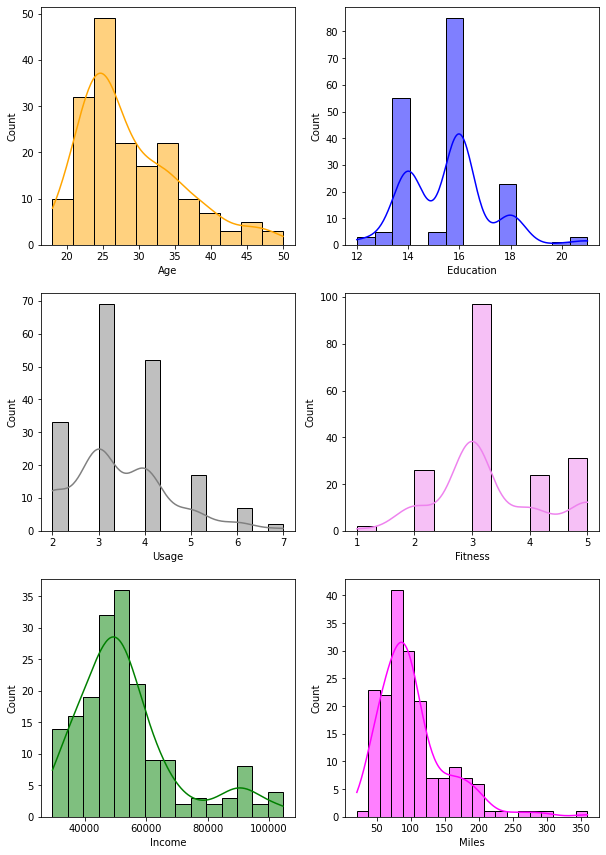

In [13]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,6))
fig.subplots_adjust(top=2)
sns.histplot(data=df, x='Age', kde=True, ax=axis[0,0],color = "orange")
sns.histplot(data=df, x='Education', kde=True, ax=axis[0,1],color = "blue")
sns.histplot(data=df, x='Usage', kde=True, ax=axis[1,0],color = "grey")
sns.histplot(data=df, x='Fitness', kde=True, ax=axis[1,1],color = "violet")
sns.histplot(data=df, x='Income', kde=True, ax=axis[2,0],color = "green")
sns.histplot(data=df, x='Miles', kde=True, ax=axis[2,1],color = "magenta")


In [ ]:
# Outliers detection using BoxPlots

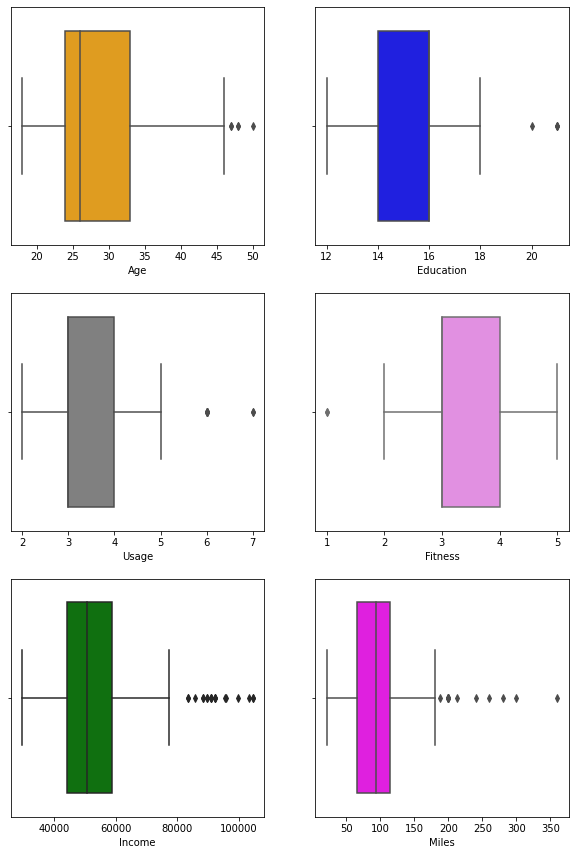

In [14]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,6))
fig.subplots_adjust(top=2)
sns.boxplot(data=df, x='Age', ax=axis[0,0],color = "orange")
sns.boxplot(data=df, x='Education', ax=axis[0,1],color = "blue")
sns.boxplot(data=df, x='Usage', ax=axis[1,0],color = "grey")
sns.boxplot(data=df, x='Fitness', ax=axis[1,1],color = "violet")
sns.boxplot(data=df, x='Income', ax=axis[2,0],color = "green")
sns.boxplot(data=df, x='Miles', ax=axis[2,1],color = "magenta")
plt.show()

In [ ]:
Insights as follows:

Even from the boxplots, it is quite clear that: 
1) Age, education, fitness and Usage are having very few outliers.
2) While income and miles have more outliers.

In [ ]:
Understanding the distribution of the data for the qualitative attributes:
1. Product
2. Gender
3. MaritalStatus

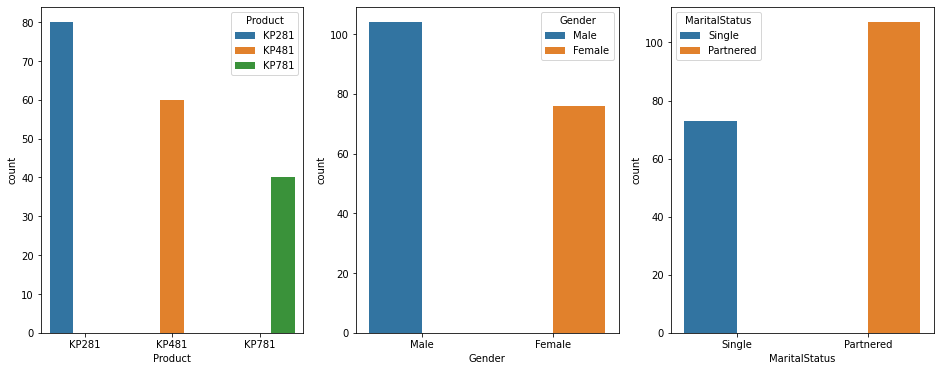

In [15]:
fig1, axs=plt.subplots(nrows=1,ncols=3, figsize=(16,6))
sns.countplot(data=df, x='Product',hue='Product', ax=axs[0])
sns.countplot(data=df, x='Gender',hue='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus',
              hue='MaritalStatus',ax=axs[2])
plt.show()

In [ ]:
Insights:

1) KP281 is the most frequent product, more than KP471 
and the latest, KP781.
2) There are more males in the data than females.
3) More partnered persons are in the data than singles.

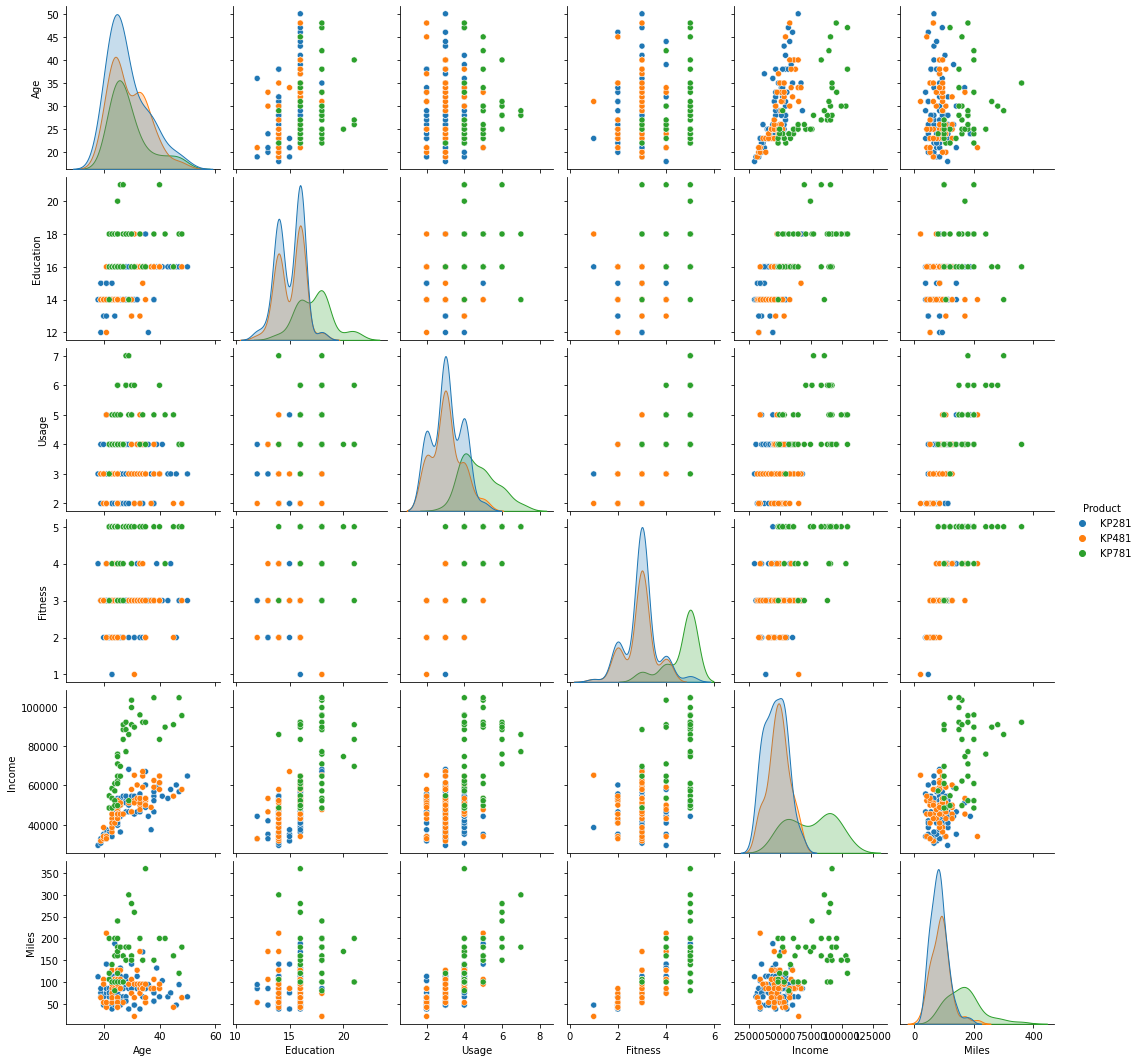

In [16]:
sns.pairplot(data=df,hue='Product')
plt.show()

In [ ]:
To be precise - normalized count for each variable is shown below:

In [17]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)*0.01

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

In [ ]:
Insights
Product
1) 44.44% of the customers have purchased KP281 product.
2) 33.33% of the customers have purchased KP481 product.
3) 22.22% of the customers have purchased KP781 product.
Gender
1) 57.78% of the customers are Male.
2) 42.22% of the customers are Female.
MaritalStatus
1) 59.44% of the customers are Partnered.
2) 40.56% of the customers are Single.

# Bivariate Analysis:

In [ ]:
Analyzing variation in products purchased with gender or marital status
1) Product vs Gender
2) Product vs Marital Status

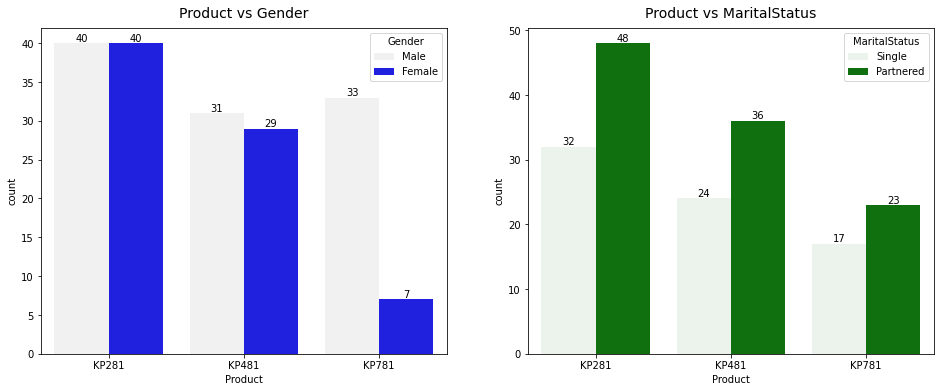

In [19]:
fig1, axs=plt.subplots(nrows=1,ncols=2, figsize=(16,6))
sns.countplot(data=df, x='Product',hue='Gender',
              color='blue',ax=axs[0])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)

for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, 
                    color='black', xytext=(0, 5),
                    textcoords='offset points')

sns.countplot(data=df, x='Product',hue='MaritalStatus',
              color='green', ax=axs[1])
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)

for p in axs[1].patches:
    axs[1].annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, 
                    color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

In [ ]:
Insights:

Product vs Gender

1) 40 males and 40 females have purchased a KP281 product 
2) 31 males and 29 females have purchased the product KP481
2) 33 males and 7 females have purchased a KP781 product.

Product vs MaritalStatus

1) 48 no partners and 32 no singles have purchased a KP281 product 
2) 36 no partners and 24 no singles have purchased a KP481 product 
3) 23 no partners and 17 no singles have purchased a KP781 product

A customer who is partnered with is more likely to purchase the product.

In [ ]:
Analyzing the variation in products purchased with the following,

1. Product vs Age
2. Product vs Education
3. Product vs Usage
4. Product vs Fitness
5. Product vs Income
6. Product vs Miles

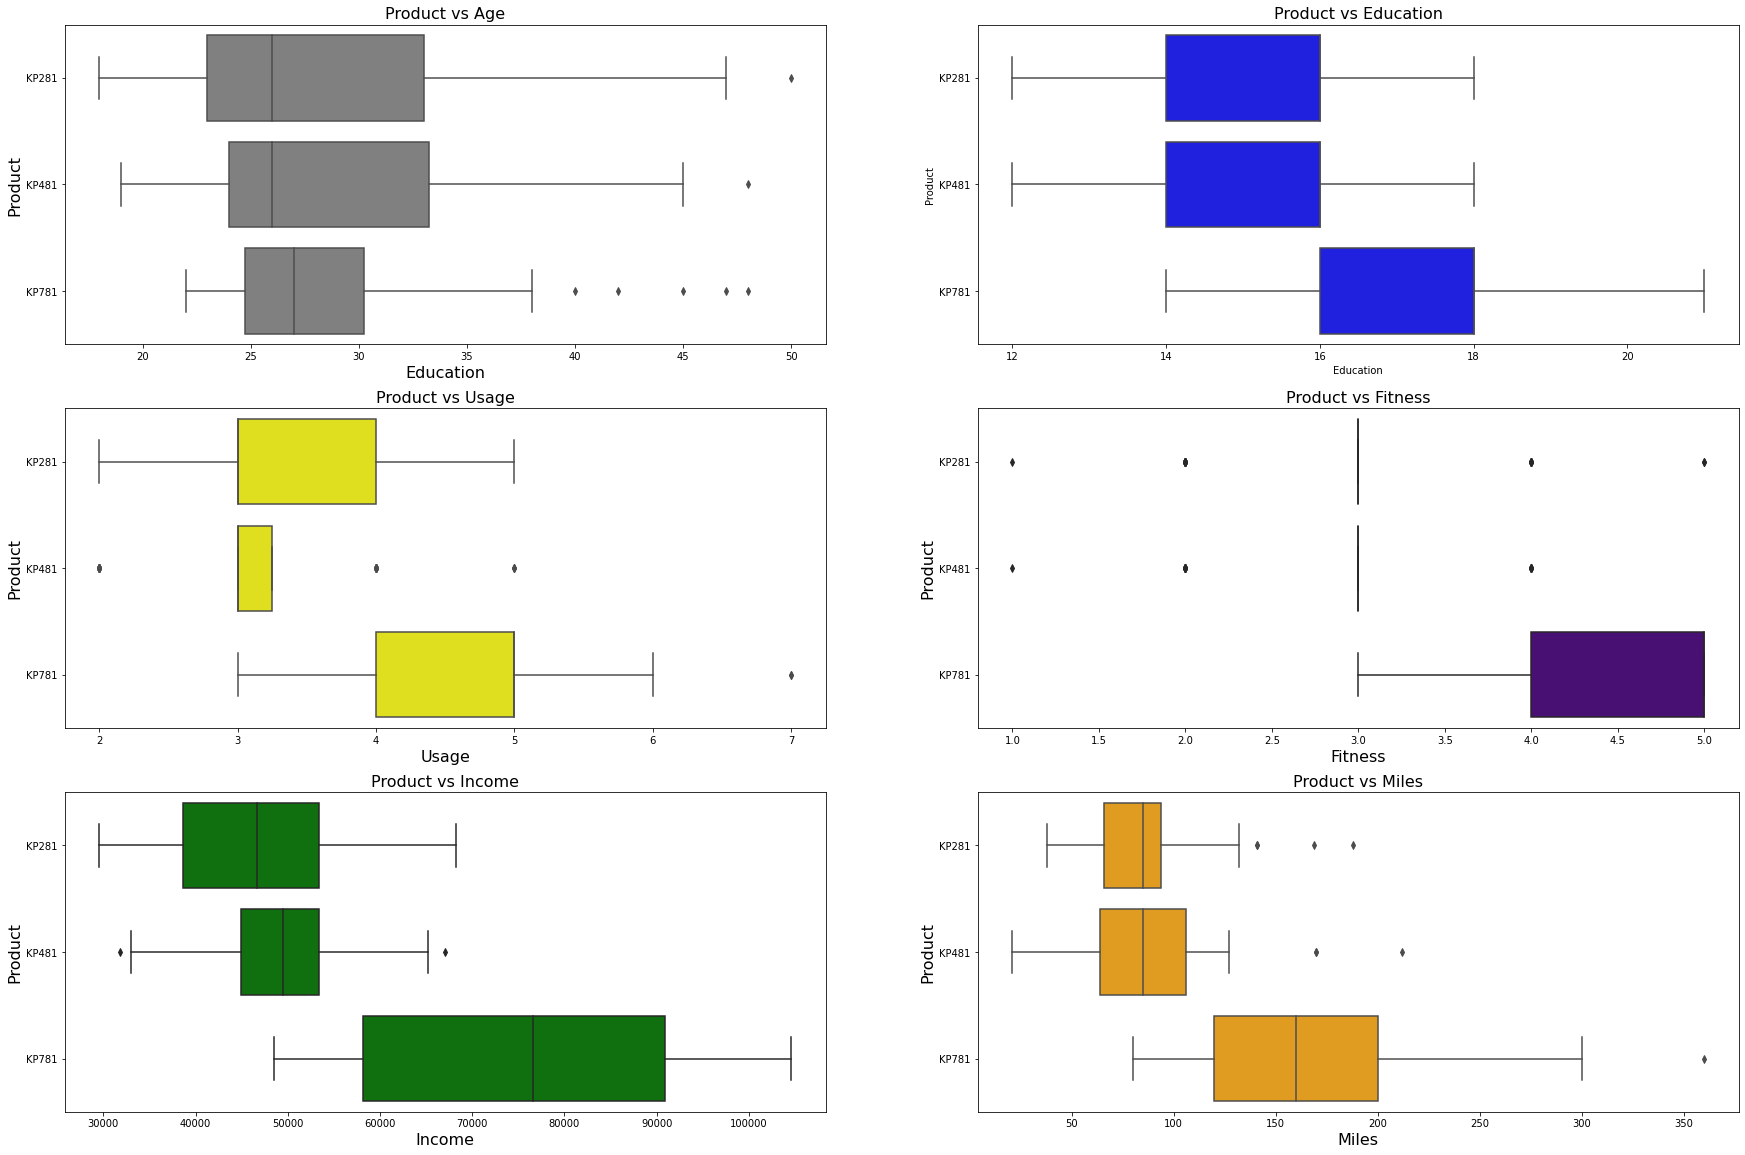

In [23]:
fig1, axs=plt.subplots(nrows=3,ncols=2, figsize=(30,20))

sns.boxplot(data=df, y='Product',x ='Age', 
            orient='h',color='grey',ax=axs[0,0])
axs[0,0].set_title("Product vs Age", fontsize=16)
axs[0,0].set_xlabel("Age", fontsize=16)  
axs[0,0].set_ylabel("Product", fontsize=16)

sns.boxplot(data=df, y='Product',x ='Education', 
            orient='h',color='blue',ax=axs[0,1])
axs[0,1].set_title("Product vs Education", fontsize=16)
axs[0,0].set_xlabel("Education", fontsize=16)  
axs[0,0].set_ylabel("Product", fontsize=16)

sns.boxplot(data=df, y='Product',x ='Usage', 
            orient='h',color='yellow',ax=axs[1,0])
axs[1,0].set_title("Product vs Usage", fontsize=16)
axs[1,0].set_xlabel("Usage", fontsize=16)  
axs[1,0].set_ylabel("Product", fontsize=16) 

sns.boxplot(data=df, y='Product',x ='Fitness', 
            orient='h',color='indigo',ax=axs[1,1])
axs[1,1].set_title("Product vs Fitness", fontsize=16)
axs[1,1].set_xlabel("Fitness", fontsize=16)  
axs[1,1].set_ylabel("Product", fontsize=16) 

sns.boxplot(data=df, y='Product',x ='Income', 
            orient='h',color='green',ax=axs[2,0])
axs[2,0].set_title("Product vs Income", fontsize=16)
axs[2,0].set_xlabel("Income", fontsize=16)  
axs[2,0].set_ylabel("Product", fontsize=16) 

sns.boxplot(data=df, y='Product',x ='Miles', 
            orient='h',color='orange',ax=axs[2,1])
axs[2,1].set_title("Product vs Miles", fontsize=16)
axs[2,1].set_xlabel("Miles", fontsize=16)  
axs[2,1].set_ylabel("Product", fontsize=16) 

plt.show()

In [ ]:
Insights:

a) Product vs Age
1) Median ages between 25 to 30, these customers 
are most likely to purchase products KP281 & KP481.
2) Customers whose age lies between 25-30, 
are more likely to buy a KP781 product.

b) Product vs Education

1) Customers whose education is greater than or 
equal to 16 years have more chances of purchasing the KP781 product. 
2) Customers with less than 16 years of e
ducation have equal chances of purchasing KP281 or KP481.

c) Product vs Usage
1) Customers who use the treadmill more 
than 4 times a week are more likely to purchase the KP781 product.
2) Customers who use the treadmill less than 4 
times a week are more likely to purchase the KP281 or KP481 product.

d) Product vs Fitness

1) Out of 5 customers whose fitness is greater 
than or equal to 3, there are higher chances of purchasing a KP781 product.

e) Product vs Income
1) When the income of a customer is greater 
than or equal to 60000,there are higher chances of purchasing a KP781 product.

f) Product vs Miles
1) Customers who walk or run greater than 
120 miles per week are higher chances of purchasing a KP781 product.
2) Customers who walk or run less than 120 miles 
per week are higher chances of purchasing a KP281 or KP481 product.

# Multivariate Analysis 

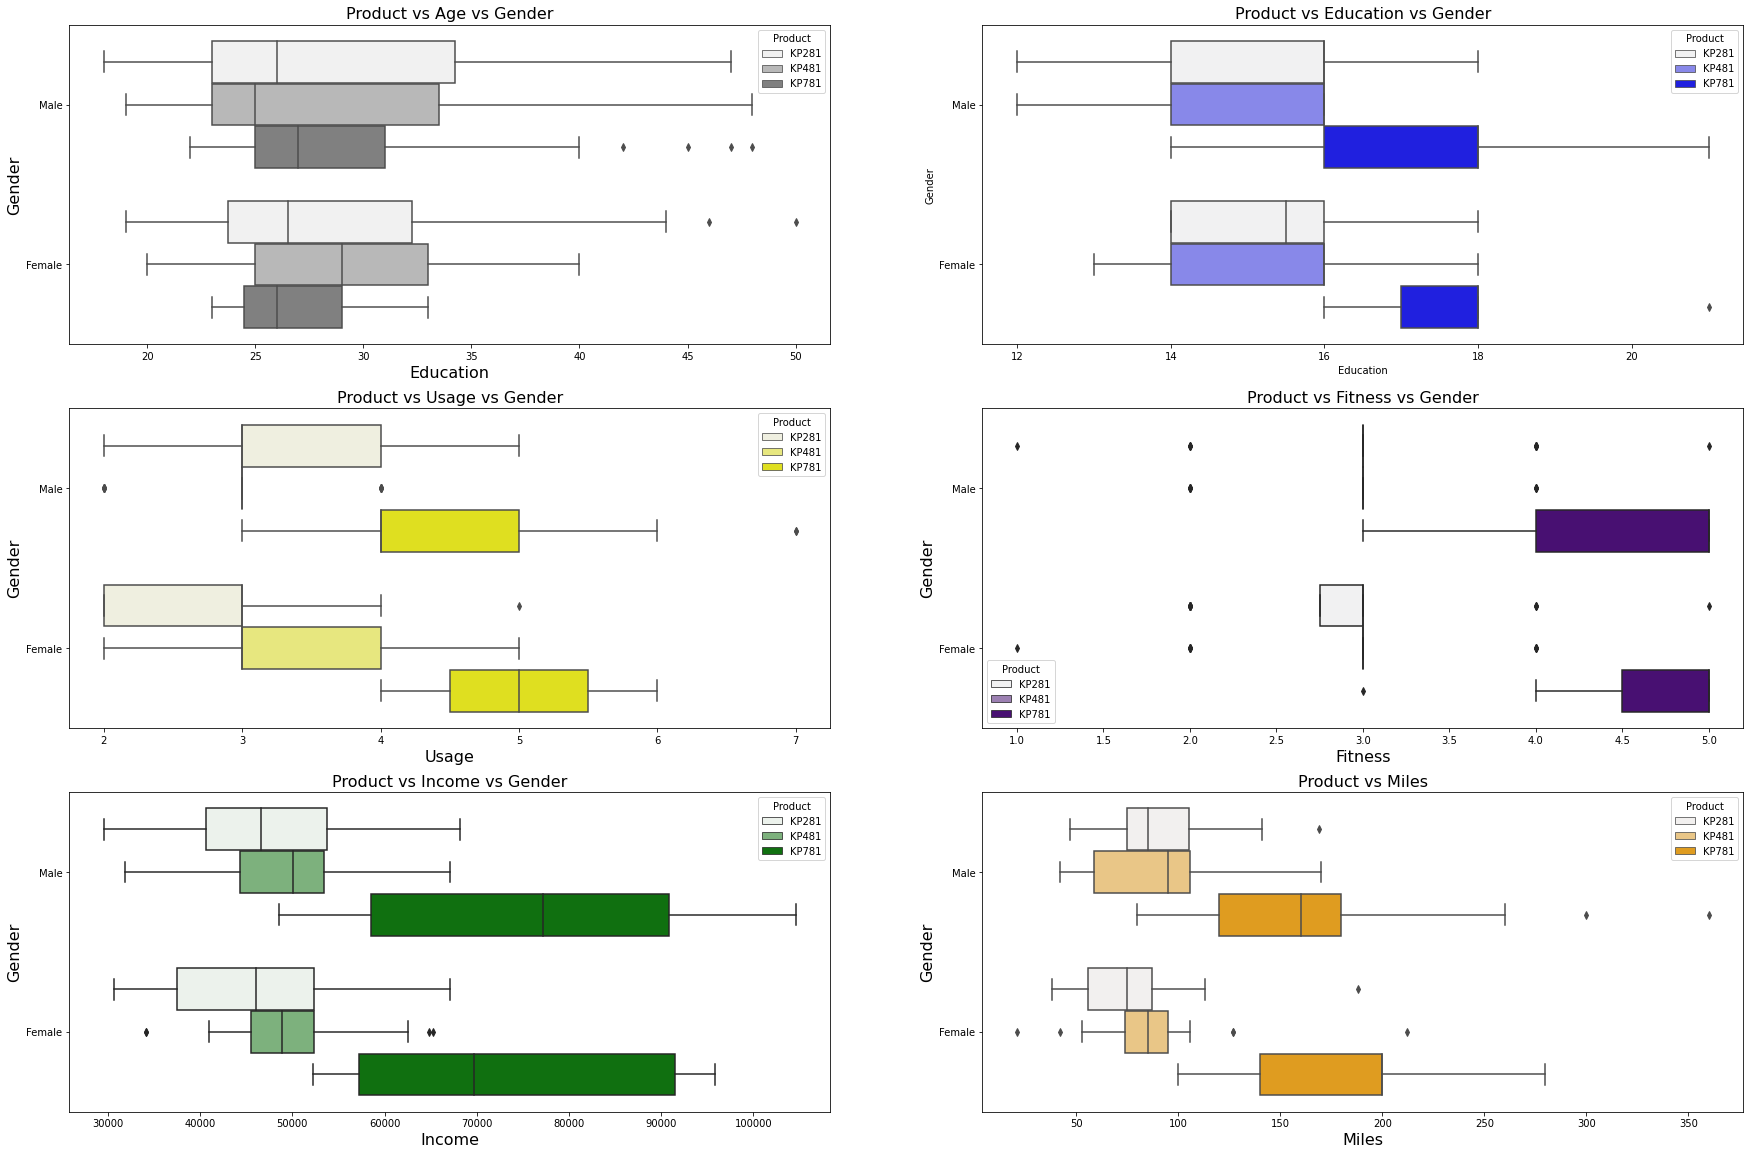

In [24]:
fig1, axs=plt.subplots(nrows=3,ncols=2, figsize=(30,20))

sns.boxplot(data=df, y='Gender',x ='Age',hue = 'Product', 
            orient='h',color='grey',ax=axs[0,0])
axs[0,0].set_title("Product vs Age vs Gender", fontsize=16)
axs[0,0].set_xlabel("Age", fontsize=16)  
axs[0,0].set_ylabel("Gender", fontsize=16)

sns.boxplot(data=df, y='Gender',x ='Education', hue = 'Product',
            orient='h',color='blue',ax=axs[0,1])
axs[0,1].set_title("Product vs Education vs Gender", fontsize=16)
axs[0,0].set_xlabel("Education", fontsize=16)  
axs[0,0].set_ylabel("Gender", fontsize=16)

sns.boxplot(data=df, y='Gender',x ='Usage', hue = 'Product',
            orient='h',color='yellow',ax=axs[1,0])
axs[1,0].set_title("Product vs Usage vs Gender", fontsize=16)
axs[1,0].set_xlabel("Usage", fontsize=16)  
axs[1,0].set_ylabel("Gender", fontsize=16) 

sns.boxplot(data=df, y='Gender',x ='Fitness', hue = 'Product',
            orient='h',color='indigo',ax=axs[1,1])
axs[1,1].set_title("Product vs Fitness vs Gender", fontsize=16)
axs[1,1].set_xlabel("Fitness", fontsize=16)  
axs[1,1].set_ylabel("Gender", fontsize=16) 

sns.boxplot(data=df, y='Gender',x ='Income', hue = 'Product',
            orient='h',color='green',ax=axs[2,0])
axs[2,0].set_title("Product vs Income vs Gender", fontsize=16)
axs[2,0].set_xlabel("Income", fontsize=16)  
axs[2,0].set_ylabel("Gender", fontsize=16) 

sns.boxplot(data=df, y='Gender',x ='Miles', hue = 'Product',
            orient='h',color='orange',ax=axs[2,1])
axs[2,1].set_title("Product vs Miles", fontsize=16)
axs[2,1].set_xlabel("Miles", fontsize=16)  
axs[2,1].set_ylabel("Gender", fontsize=16) 

plt.show()

In [ ]:
Insights

a) Product vs Age vs Gender
1) For all the products, the median age lies 
between 25 to 30 for both genders.

b) Product vs Education vs Gender
1) Gender male with education greater than 
16 years purchase KP781 product as compare to female purchase is low.
2) Both genders, male and female, with years of 
less than 16 years, purchases of the KP281 & KP481 are almost equal in numbers.

c) Product vs Usage vs Gender

1) Females planning to use a treadmill 
3-4 times a week are more likely to buy KP481 product

d) Product vs Fitness vs Gender

1) Gender males whose fitness is greater than or 
equal to 4, have higher chances of purchasing a KP781 product compared to purchases that are lower.

e) Product vs Income vs Gender
1) When the income of both genders is greater than 
or equal to 55000,there are higher chances of purchasing a KP781 product.

f) Product vs Miles vs Gender
1) Both genders who walk or run greater than 
120 miles per week have higher chances of purchasing a KP781 product.

# Computing Marginal & Conditional Probabilities:

# Marginal Probability

In [25]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

# Conditional Probabilities

# Probability of each product given gender:

In [27]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"Probability_of_Male: {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"Probability_of_Female: {df1.loc['Female'].sum()/len(df):.2f}\n")
    print(f"Probability_of(KP781_product/{gender}): {p_781:.2f}")
    print(f"Probability_of(KP481/{gender}): {p_481:.2f}")
    print(f"Probability_of(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female', True)

Probability_of_Male: 0.58
Probability_of_Female: 0.42

Probability_of(KP781_product/Male): 0.32
Probability_of(KP481/Male): 0.30
Probability_of(KP281/Male): 0.38

Probability_of_Male: 0.58
Probability_of_Female: 0.42

Probability_of(KP781_product/Female): 0.09
Probability_of(KP481/Female): 0.38
Probability_of(KP281/Female): 0.53



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Rathik\AppData\Local\Temp\ipykernel_10580\1020516711.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
C:\Users\Rathik\AppData\Local\Temp\ipykernel_10580\1020516711.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


# Insight:
Overall product Probability (Male vs Female):
Probability of Male gender purchasing the product is 58%
Probability of Female gender purchasing the product is 42%

Probability of product KP781:
Probability of Male gender purchasing the product KP781 is 32%
Probability of Female gender purchasing the product KP781 is 9%

Probability of product KP481:
Probability of Male gender purchasing the product KP481 is 30%
Probability of Female gender purchasing the product KP481 is 38%

Probability of product KP281:
Probability of Male gender purchasing the product KP281 is 38%
Probability of Female gender purchasing the product KP281 is 53%

# Recommendations

1) KP281 is the most frequent product.
2) Ages between 25 to 30, these customers are 
most likely to purchase products KP281 & KP481.
3) Customers whose age lies between 25-30, are more likely to buy a KP781 product.
4) Customers whose education is greater than or 
equal to 16 years have more chances of purchasing the KP781 product. 
5) Customers whose fitness is greater 
than or equal to 3, there are higher chances of purchasing a KP781 product.
6) Income of a customer is greater 
than or equal to 60000,there are higher chances of purchasing a KP781 product.
7) Females planning to use a treadmill 
3-4 times a week are more likely to buy KP481 product